
# 🧑‍💻 K-Nearest Neighbors (KNN) Workshop

Welcome to the **KNN Active Learning Workshop**!  
In this session, you will learn how to apply the **K-Nearest Neighbors algorithm** in practice, while also exploring **data analysis techniques** and **machine learning design patterns**.

This workshop is designed for **peer programming** and **active learning** — you will collaborate with classmates to brainstorm, code, and reflect.

---



## 🎯 Learning Objectives

By the end of this workshop, you should be able to:

1. Explain the intuition behind the K-Nearest Neighbors algorithm.  
2. Acquire and preprocess datasets from different sources (CSV, APIs, Relational Databases).  
3. Apply KNN for classification on multiple datasets.  
4. Use the **Machine Learning Pipeline Pattern** to architect modular, reproducible ML code.  
5. Reflect on KNN’s performance, strengths, and limitations, and when to apply it in real-world scenarios.  

---



## ⏳ Before the Workshop

Make sure you are ready with the following setup:

1. **Environment Setup**  
   - Use Python 3.9+ with `scikit-learn`, `pandas`, `matplotlib`, `requests`, and `sqlalchemy`.  
   - You can install everything with:  
     ```bash
     pip install scikit-learn pandas matplotlib requests sqlalchemy psycopg2-binary
     ```

2. **Data Sources**  
   You will use **three types of data sources** in this workshop:
   - **CSV file**: e.g., [UCI ML Repository](https://archive.ics.uci.edu/) datasets.  
   - **API**: e.g., the [OpenWeather API](https://open-meteo.com/) for weather data.  
   - **Relational Database**: either connect to a public database or create your own using [Neon](https://neon.com/).  

   👉 Bring at least one dataset of your choice from *each category*.  

3. **Peer Programming**  
   - Pair up with another student.  
   - Take turns: one codes, one reviews. Switch every 15 minutes.  


## 🧩 Explore the KNN Algorithm with a Simulator

Before coding, let’s explore how KNN works visually. This simulator allows you to place data points on a 2D plane, adjust the number of neighbors (*k*), and observe how predictions change based on distance and class boundaries. Experimenting here builds intuition before we implement KNN in Python.

🔗 [Interactive KNN Simulator](https://k-nearest-neighbors.vercel.app/)

---



## 🌸 Part 1: Warm-up with the Iris Dataset

We’ll begin with the **Iris dataset**, a classic dataset in machine learning.

**Task:** Implement and evaluate a KNN classifier to predict the species of iris flowers.



The **basic KNN workflow** on the Iris dataset:
- **Load data:** `load_iris()` gives features (sepal/petal length and width) and target (species).
- **Split:** `train_test_split` reserves 20% for testing with a fixed `random_state` for reproducibility.
- **Train:** A `KNeighborsClassifier` with `n_neighbors=3` is fitted on the training set.
- **Evaluate:** Predictions on the test set are compared to true labels using `accuracy_score`.

In [1]:

# Import scikit-learn: dataset loader, train/test splitter, KNN classifier, and accuracy metric
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the built-in Iris dataset (features and target labels)
iris = load_iris()
X, y = iris.data, iris.target

# Split into 80% train and 20% test with fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier with k=3 neighbors and fit it on the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set and print accuracy (fraction of correct predictions)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Now that we’ve trained and evaluated a KNN classifier on the Iris dataset, let’s move from raw accuracy metrics to a more visual understanding. By plotting the first two features—**sepal length** and **sepal width**—we can observe how different iris species cluster, and how KNN relies on these dimensions for classification.


**visualizes the Iris dataset** using the first two features (sepal length and sepal width):
- A scatter plot is drawn for each of the three species with different colors (red, green, blue).
- Axis labels use the dataset’s feature names. This helps see how classes cluster and why KNN can separate them well in 2D.

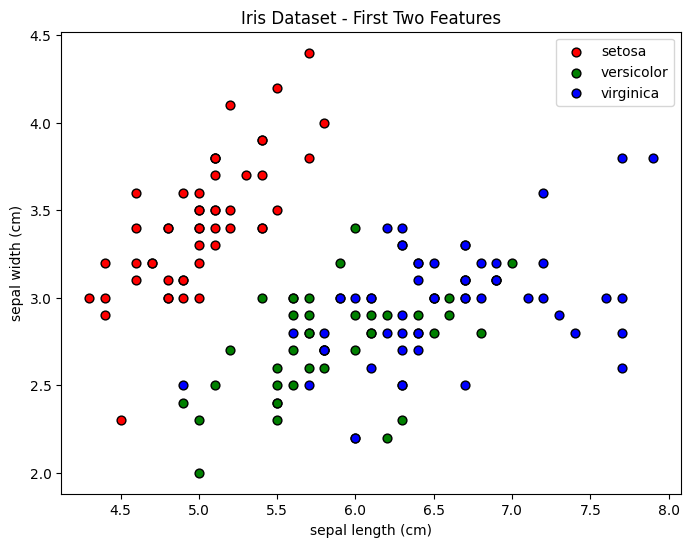

In [2]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches
plt.figure(figsize=(8, 6))
# Loop over the three classes (0, 1, 2), assign color and species name, and scatter sepal length (col 0) vs sepal width (col 1)
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
# Set axis labels from dataset feature names (sepal length, sepal width)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# Add title and legend, then display the plot
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

The scatter plot gave us a visual sense of how the Iris data clusters when using sepal length and width. To move beyond visualization, we now use our trained KNN model to make predictions on unseen test data, evaluate its accuracy, and inspect example classifications in detail.  

💡 **Note for reflection:** The performance of KNN depends heavily on two design choices:  
1. The value of *k* (number of neighbors).  
2. How features are scaled (since distances drive the algorithm).  

Think about how changing either might alter your results.


**uses the trained KNN model** to predict on the test set and inspects one example:
- `knn.predict(X_test)` gets predicted labels for all test samples.
- A single test sample (e.g. index 10) is printed with its features, true label, and predicted label.
- Test set accuracy is printed. The comment block explains that KNN classifies by majority vote among the *k* nearest training points.

In [3]:
# Get predicted class labels for every sample in the test set
y_pred = knn.predict(X_test)

# Compute accuracy (correct predictions / total) and store in variable
accuracy = accuracy_score(y_test, y_pred)
# Print header and pick one test sample (index 10) to inspect
print("KNN Classifier for Iris Dataset")
sample_idx = 10
# Show the four feature values for that sample
print("Sample features:", X_test[sample_idx])
# Show the actual species (ground truth)
print("True label:", y_test[sample_idx])
# Show what KNN predicted for that sample
print("Predicted label:", y_pred[sample_idx])
# Print overall test accuracy formatted to 2 decimal places
print(f"Test set accuracy: {accuracy:.2f}")

# KNN assigns a label by majority vote among the k nearest training points; here we classify iris by features.

KNN Classifier for Iris Dataset
Sample features: [6.5 3.2 5.1 2. ]
True label: 2
Predicted label: 2
Test set accuracy: 1.00


By comparing predicted labels against the ground truth, we can directly measure how well the model generalizes beyond the training set. Accuracy provides a simple performance metric, but it is equally valuable to look at individual predictions. This allows us to interpret success cases and identify where the model struggles.

**plots the same Iris scatter** but highlights one test point:
- The chosen test sample is drawn as a yellow star; its predicted class is shown in an annotation.
- This shows where the point lies relative to the three species and how KNN assigned its label.

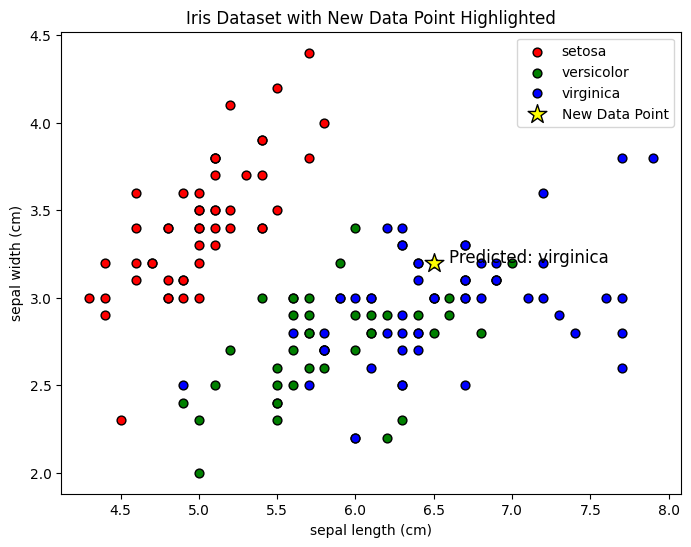

In [4]:
# Draw the same 2D scatter as before so we can see where the test point sits among the classes
plt.figure(figsize=(8, 6))
# Plot all training points by class (red/green/blue)
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)

# Overlay the chosen test point as a large yellow star so it stands out
plt.scatter(X_test[sample_idx, 0], X_test[sample_idx, 1], 
            c='yellow', edgecolor='black', s=200, marker='*', label='New Data Point')

# Get the predicted class index and add a text annotation next to the star with the predicted species name
predicted_label = y_pred[sample_idx]
plt.text(X_test[sample_idx, 0]+0.1, X_test[sample_idx, 1], 
         f'Predicted: {iris.target_names[predicted_label]}', fontsize=12, color='black')

# Set axis labels, title, legend, and display
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset with New Data Point Highlighted")
plt.legend()
plt.show()


## 📊 Part 2: Apply KNN on a Real-World Dataset

Now it’s your turn to **go beyond the Iris dataset**.

### Step 1: Acquire Data
Choose one of the following:  
- **CSV**: Download a dataset (e.g., Titanic dataset from Kaggle or UCI).  
- **API**: Query an API like OpenWeather or a sports stats API. Use `requests` to fetch JSON data.  
- **Database**: Connect to a Neon-hosted PostgreSQL database.  

👉 Work with your partner to **select a real-world dataset** that excites you.  

### Step 2: Preprocess Data
- Clean missing values.  
- Normalize numerical features.  
- Encode categorical variables if needed.  

### Step 3: Implement KNN
- Split into train/test sets.  
- Fit KNN.  
- Evaluate accuracy, precision, recall, or other metrics as appropriate.  



**fetches data from the Open-Meteo API** as an example of API-based data acquisition:
- `requests.get(url)` retrieves hourly temperature forecast for Berlin (lat/lon 52.52, 13.41).
- The JSON response is parsed and the `hourly` key is converted into a pandas DataFrame.
- The result is a table of timestamps and `temperature_2m` values. A TODO suggests preprocessing and applying KNN to this data.

In [5]:

# Example: Loading a dataset from an API (Open-Meteo)
import requests
import pandas as pd

# API URL for Berlin (lat 52.52, lon 13.41) with hourly temperature_2m
url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m"
# Send HTTP GET request and get response object
response = requests.get(url)
# Parse JSON body into a Python dict
data = response.json()

# Build a DataFrame from the 'hourly' key (list of time and temperature_2m)
df = pd.DataFrame(data['hourly'])
# Show first 5 rows to verify structure
print(df.head())

# TODO: Preprocess this dataset and apply KNN


               time  temperature_2m
0  2026-02-13T00:00             2.4
1  2026-02-13T01:00             2.3
2  2026-02-13T02:00             2.2
3  2026-02-13T03:00             2.0
4  2026-02-13T04:00             1.4


**preprocesses the API weather data** for KNN classification:
- **Missing values:** Checked with `isnull().sum()`.
- **Time parsing:** The `time` column is converted to datetime; then `hour`, `day`, and `month` are extracted as features.
- **Target:** A `temp_label` is created by binning temperature into three classes: cold (≤5°C), mild (5–15°C), and warm (>15°C). This turns the problem into a classification task.

In [6]:
# Count missing values per column (useful before modeling)
print("Missing values:\n", df.isnull().sum())

# Convert string timestamps to pandas datetime for feature extraction
df["time"] = pd.to_datetime(df["time"])

# Create numeric features from time: hour of day, day of month, month
df["hour"] = df["time"].dt.hour
df["day"] = df["time"].dt.day
df["month"] = df["time"].dt.month

# Define a function to bin temperature into 3 classes (0=cold, 1=mild, 2=warm)
def temp_category(temp):
    if temp <= 5:
        return 0  # cold
    elif temp <= 15:
        return 1  # mild
    else:
        return 2  # warm

# Apply the function to create target column for classification
df["temp_label"] = df["temperature_2m"].apply(temp_category)

# Display first rows to confirm new columns
print(df.head())


Missing values:
 time              0
temperature_2m    0
dtype: int64
                 time  temperature_2m  hour  day  month  temp_label
0 2026-02-13 00:00:00             2.4     0   13      2           0
1 2026-02-13 01:00:00             2.3     1   13      2           0
2 2026-02-13 02:00:00             2.2     2   13      2           0
3 2026-02-13 03:00:00             2.0     3   13      2           0
4 2026-02-13 04:00:00             1.4     4   13      2           0


**trains and evaluates KNN on the API dataset** using an ML pipeline:
- Features are `hour`, `day`, `month`; target is `temp_label`. Data is split with stratification.
- A **Pipeline** chains `StandardScaler` (so distances are on a comparable scale) and `KNeighborsClassifier(n_neighbors=5)`.
- The pipeline is fitted on the training set; predictions on the test set are evaluated with accuracy, confusion matrix, and classification report.

In [7]:
# Imports: split, pipeline, scaler, KNN, and classification metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature matrix: hour, day, month; target: temp_label (0/1/2)
X = df[["hour", "day", "month"]]
y = df["temp_label"]

# 80/20 split with stratification so each set has similar class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: first scale features (important for distance-based KNN), then KNN with k=5
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

# Fit the pipeline on training data (scaler learns mean/std, KNN stores training points)
model.fit(X_train, y_train)

# Predict class labels for test set
y_pred = model.predict(X_test)

# Print accuracy, confusion matrix, and per-class precision/recall/f1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



/Users/thanmayaanil/Desktop/Python/KNearestNeighbors_Workshop/knn_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### ✅ Part 2B: CSV Dataset Example (Titanic)

Below we load a real-world **CSV dataset** (Titanic) directly from a public CSV URL, preprocess it (missing values, encoding, scaling), and apply **KNN classification**.

**Explanation (Code below):**  
This cell **loads the Titanic dataset from a CSV URL** (real-world CSV example):
- `pd.read_csv(titanic_url)` fetches the dataset from the seaborn-data GitHub repository.
- Shape and the first few rows are printed so you can inspect columns (e.g. survived, pclass, sex, age, fare, embarked) and missing values.

In [8]:
# Import pandas for DataFrame operations
import pandas as pd

# URL of the Titanic CSV in the seaborn-data GitHub repo
titanic_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
# Read CSV from URL into a DataFrame
titanic_df = pd.read_csv(titanic_url)

# Print dimensions (rows, columns) and show first 5 rows
print("Titanic dataset shape:", titanic_df.shape)
titanic_df.head()

Titanic dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**prepares the Titanic data** for modeling:
- Only the columns needed for features and target are kept: `pclass`, `sex`, `age`, `sibsp`, `parch`, `fare`, `embarked`, and `survived`.
- Missing-value counts are printed (e.g. many missing in `age`, a few in `embarked`). The next pipeline will handle imputation and encoding.

In [9]:
# Keep only columns we will use as features plus the target
# Target: survived (0 = no, 1 = yes)
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
target = "survived"

# Subset the DataFrame to these columns and work on a copy
titanic_df = titanic_df[features + [target]].copy()

# Show count of missing values per column (age and embarked may have NaNs)
print("Missing values:\n", titanic_df.isnull().sum())
# Display first 5 rows of the cleaned data
titanic_df.head()

Missing values:
 pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
survived      0
dtype: int64


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [10]:
# Imports: split, ColumnTransformer, Pipeline, encoders, imputer, KNN, metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build feature matrix X and target vector y from the selected columns
X_csv = titanic_df[features]
y_csv = titanic_df[target]

# Stratified 80/20 split so train and test have similar class balance
X_train_csv, X_test_csv, y_train_csv, y_test_csv = train_test_split(
    X_csv, y_csv, test_size=0.2, random_state=42, stratify=y_csv
)

# Define which columns are numeric vs categorical for different preprocessing
numeric_features = ["age", "sibsp", "parch", "fare", "pclass"]
categorical_features = ["sex", "embarked"]

# Numeric pipeline: fill missing with median, then standardize (zero mean, unit variance)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: fill missing with most frequent value, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer applies num pipeline to numeric cols and cat pipeline to categorical cols
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Full pipeline: preprocess then KNN with k=7
csv_knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

# Fit on training data, predict on test data
csv_knn_pipeline.fit(X_train_csv, y_train_csv)
y_pred_csv = csv_knn_pipeline.predict(X_test_csv)

# Print accuracy, confusion matrix, and precision/recall/f1 per class
print("CSV (Titanic) KNN Accuracy:", accuracy_score(y_test_csv, y_pred_csv))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_csv, y_pred_csv))
print("\nClassification Report:\n", classification_report(y_test_csv, y_pred_csv))

CSV (Titanic) KNN Accuracy: 0.7988826815642458

Confusion Matrix:
 [[97 13]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



**builds and runs the full KNN pipeline on the Titanic CSV data**:
- **ColumnTransformer** applies different preprocessing: numeric columns (age, sibsp, parch, fare, pclass) get median imputation and `StandardScaler`; categorical (sex, embarked) get most-frequent imputation and one-hot encoding.
- A single **Pipeline** combines this preprocessor with `KNeighborsClassifier(n_neighbors=7)`.
- After train/test split (stratified), the pipeline is fitted and evaluated with accuracy, confusion matrix, and classification report.

In [11]:
# Try several k values to see which gives the best test accuracy
for k in [1, 3, 5, 7, 9, 11]:
    # Build a new pipeline with same preprocessor but KNN with current k
    model = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    # Fit on train data
    model.fit(X_train_csv, y_train_csv)
    # Score = accuracy on test set
    acc = model.score(X_test_csv, y_test_csv)
    # Print k and its accuracy (e.g. k= 5 -> accuracy=0.816)
    print(f"k={k:>2} -> accuracy={acc:.3f}")

k= 1 -> accuracy=0.726
k= 3 -> accuracy=0.816
k= 5 -> accuracy=0.816
k= 7 -> accuracy=0.799
k= 9 -> accuracy=0.793
k=11 -> accuracy=0.793


**sweeps over different values of k** (1, 3, 5, 7, 9, 11) for the Titanic KNN model:
- For each *k*, a new pipeline (same preprocessor + KNN with that *k*) is trained and scored on the test set.
- Printing each *k* and its accuracy lets you compare and choose a reasonable hyperparameter (e.g. k=3 or k=5 often do well here).

### ✅ Part 2C: Relational Database Example (SQLite + SQLAlchemy)

To demonstrate a **Relational Database** source, we will:
1. Create a small SQLite database using SQLAlchemy  
2. Insert the Titanic data into a table  
3. Query it back using SQL  
4. Run the same KNN pipeline

In [12]:
# Import SQLAlchemy's create_engine to connect to a database
from sqlalchemy import create_engine

# Create engine for SQLite file knn_workshop.db in current directory; echo=False suppresses SQL logging
engine = create_engine("sqlite:///knn_workshop.db", echo=False)

**creates a local SQLite database connection** using SQLAlchemy:
- `create_engine("sqlite:///knn_workshop.db")` creates (or connects to) a file `knn_workshop.db` in the project folder.
- `echo=False` keeps SQL logging off. This engine is used in the next cells to write and read the Titanic table.

In [13]:
# Write the Titanic DataFrame to a table named 'titanic'; replace if it already exists; don't write row index
titanic_df.to_sql("titanic", engine, if_exists="replace", index=False)

# Read all rows from the titanic table back into a DataFrame (simulates loading from a DB)
titanic_db_df = pd.read_sql("SELECT * FROM titanic", engine)

# Print shape and first 5 rows to confirm data matches
print("DB dataset shape:", titanic_db_df.shape)
titanic_db_df.head()

DB dataset shape: (891, 8)


,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


**writes the Titanic DataFrame to the database and reads it back**:
- `titanic_df.to_sql("titanic", engine, if_exists="replace", index=False)` creates or replaces a table named `titanic` with the current DataFrame.
- `pd.read_sql("SELECT * FROM titanic", engine)` loads the data back into a DataFrame via a SQL query, demonstrating a relational-database data source for the same KNN workflow.

In [14]:
# Extract features and target from the DataFrame we read from the database
X_db = titanic_db_df[features]
y_db = titanic_db_df[target]

# Same 80/20 stratified split and random_state as CSV so results are comparable
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(
    X_db, y_db, test_size=0.2, random_state=42, stratify=y_db
)

# Same pipeline as CSV: preprocessor (impute + scale/encode) then KNN k=7
db_knn_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=7))
])

# Fit on DB-derived train data and predict on DB-derived test data
db_knn_pipeline.fit(X_train_db, y_train_db)
y_pred_db = db_knn_pipeline.predict(X_test_db)

# Print metrics (should match CSV run since data is the same)
print("DB (SQLite) KNN Accuracy:", accuracy_score(y_test_db, y_pred_db))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_db, y_pred_db))
print("\nClassification Report:\n", classification_report(y_test_db, y_pred_db))

DB (SQLite) KNN Accuracy: 0.7988826815642458

Confusion Matrix:
 [[97 13]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



**runs the same KNN pipeline on the data loaded from the database**:
- Features and target are taken from `titanic_db_df` (the DataFrame read from SQLite).
- The same train/test split (with the same `random_state`) and the same preprocessor + KNN pipeline are used.
- Results (accuracy, confusion matrix, report) should match the CSV-based run, showing that the pipeline is independent of whether the data came from CSV or DB.


## 🏗️ Part 3: Architecting with the ML Pipeline Pattern

In professional ML, we use the **Machine Learning Pipeline Pattern**:  

- Chain modular components in a **linear sequence** or **DAG structure**.  
- Each step should be reusable, testable, and clearly defined.  

Example pipeline for KNN:  
1. **Data Acquisition** → from CSV/API/DB  
2. **Data Cleaning & Preprocessing** → normalization, encoding, etc.  
3. **Feature Engineering**  
4. **Model Training**  
5. **Evaluation & Validation**  
6. **Deployment / Reflection**  

👉 Your task: Implement your experiment using **functions or classes** for each stage.  


In [15]:
# ✅ ML Pipeline Pattern: load -> preprocess -> train -> evaluate (each stage reusable)

from typing import Tuple, Dict, Any
import numpy as np
import pandas as pd
import requests

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def load_data_api_open_meteo(latitude: float = 52.52, longitude: float = 13.41) -> pd.DataFrame:
    """Load hourly temperature data from Open-Meteo API."""
    # Build URL with lat/lon and hourly temperature_2m parameter
    url = (
        "https://api.open-meteo.com/v1/forecast"
        f"?latitude={latitude}&longitude={longitude}&hourly=temperature_2m"
    )
    # GET request with 30s timeout; raise if status not OK
    response = requests.get(url, timeout=30)
    response.raise_for_status()
    # Parse JSON and return DataFrame from the 'hourly' key
    data = response.json()
    return pd.DataFrame(data["hourly"])

def preprocess_api_temperature(df_raw: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
    """Feature engineering + label creation for API dataset."""
    df_local = df_raw.copy()
    # Parse time string to datetime, then extract hour, day, month as features
    df_local["time"] = pd.to_datetime(df_local["time"])
    df_local["hour"] = df_local["time"].dt.hour
    df_local["day"] = df_local["time"].dt.day
    df_local["month"] = df_local["time"].dt.month

    def temp_category(temp: float) -> int:
        # Bin temperature into 0=cold, 1=mild, 2=warm for classification
        if temp <= 5:
            return 0  # cold
        elif temp <= 15:
            return 1  # mild
        return 2      # warm

    # Target = temp category; features = hour, day, month
    y = df_local["temperature_2m"].apply(temp_category)
    X = df_local[["hour", "day", "month"]]
    return X, y

def build_knn_numeric_pipeline(k: int = 5) -> Pipeline:
    """Pipeline Pattern: scale numeric features + KNN."""
    return Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

def evaluate_classifier(model: Pipeline, X_test: pd.DataFrame, y_test: pd.Series) -> Dict[str, Any]:
    """Return common evaluation outputs."""
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, digits=3),
    }

# --- Run the pipeline on the API dataset (reproducible flow) ---
api_df = load_data_api_open_meteo()
X_api, y_api = preprocess_api_temperature(api_df)

# Stratified 80/20 split
X_train_api, X_test_api, y_train_api, y_test_api = train_test_split(
    X_api, y_api, test_size=0.2, random_state=42, stratify=y_api
)

# Build pipeline (scaler + KNN k=5), fit, then evaluate and print metrics
api_model = build_knn_numeric_pipeline(k=5)
api_model.fit(X_train_api, y_train_api)

api_metrics = evaluate_classifier(api_model, X_test_api, y_test_api)
print("API Pipeline Accuracy:", api_metrics["accuracy"])
print("API Confusion Matrix:\n", api_metrics["confusion_matrix"])
print("API Classification Report:\n", api_metrics["report"])

API Pipeline Accuracy: 1.0
API Confusion Matrix:
 [[34]]
API Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        34

    accuracy                          1.000        34
   macro avg      1.000     1.000     1.000        34
weighted avg      1.000     1.000     1.000        34



/Users/thanmayaanil/Desktop/Python/KNearestNeighbors_Workshop/knn_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**implements the ML Pipeline Pattern** with modular, reusable functions:
- **`load_data_api_open_meteo`:** Fetches hourly temperature data from the Open-Meteo API for given latitude/longitude.
- **`preprocess_api_temperature`:** Converts time to datetime, creates hour/day/month features, and builds a categorical target (cold/mild/warm) from temperature.
- **`build_knn_numeric_pipeline`:** Returns a scikit-learn Pipeline (StandardScaler + KNN) for numeric features.
- **`evaluate_classifier`:** Runs predictions and returns accuracy, confusion matrix, and classification report.
- The bottom of the cell runs the full flow: load → preprocess → split → build pipeline → fit → evaluate, demonstrating a clean, testable pipeline structure.

## 🔍 End of Part 1: Reflection

Discuss the following with your peers:  

1. How did KNN perform on your dataset?  
2. What preprocessing decisions most affected performance?  
3. What are the strengths and weaknesses of KNN?  
4. When would you **not** use KNN in practice?  
5. How could this workflow be extended in an **MLOps context** (automation, CI/CD, monitoring)?  

👉 Write your reflections in the cell below.


#### 💭 Reflection: Talking Points (What we observed)

1. **How did KNN perform?**  
   - **Iris (built-in dataset):** KNN achieved high accuracy because the classes are well separated in feature space.  
   - **API (Open‑Meteo):** After creating a categorical label (*cold/mild/warm*) and using time-based features (*hour/day/month*), KNN can learn simple patterns, but results depend heavily on how the label bins are defined.  
   - **CSV / DB (Titanic):** KNN gives reasonable baseline performance but can struggle with class imbalance and noisy/missing real‑world data.

2. **Preprocessing decisions that affected performance most**  
   - **Scaling numeric features** (StandardScaler) mattered a lot because KNN is distance-based.  
   - **Handling missing values** (median / most-frequent imputation) improved stability.  
   - **Encoding categorical features** (One-Hot Encoding) was required for Titanic and directly impacted distance calculations.

3. **Strengths of KNN**  
   - Simple to understand and fast to prototype  
   - Works well on smaller datasets  
   - Flexible decision boundaries (non‑linear)

4. **Weaknesses / limitations of KNN**  
   - Slow prediction on large datasets (computes distances to many points)  
   - Sensitive to feature scale and irrelevant features  
   - Can degrade in high dimensions (“curse of dimensionality”)

5. **When NOT to use KNN**  
   - Very large datasets or real-time systems requiring extremely fast predictions  
   - High‑dimensional data (e.g., raw text or many sparse features)  
   - When interpretability of feature effects is required

6. **How this can extend to MLOps**  
   - Automate data ingestion + preprocessing + training (scheduled pipelines)  
   - Track experiments (metrics, k values, dataset versions)  
   - Model versioning + deployment as an API  
   - Monitoring for drift (changes in data distribution) and retraining triggers

**Peer notes (add your class discussion here):**  
- Our partner team suggested trying different `k` values and comparing results.  
- We discussed that KNN is a strong baseline, but other models (Logistic Regression, Random Forest) can perform better on Titanic.

## 🚀 Challenge

Your **challenge is to implement KNN on a brand new dataset** (not Iris).  

- Acquire data from an API or a database.  
- Preprocess it properly.  
- Train and evaluate KNN.  
- Compare results with your peers.  
- **Bonus:** Try tuning hyperparameters (number of neighbors, distance metric).  

### 🤝 Peer Programming Exercise

This workshop is based on **active learning** and requires you to engage in **peer programming** with your classmates.  
Peer programming means that two groups of students work together on the same code:  

- **Driver:** Types the code, explains aloud what they are doing.  
- **Navigator:** Reviews, asks questions, spots mistakes, and thinks strategically about next steps.  

Switch roles every 15–20 minutes.  

### 📝 Step-by-Step Exercise

Work with your partner to complete the following exercise:  

1. **Acquire data**  
   - Choose a dataset from an API (e.g., weather, finance, or sports stats) or connect to a relational database (e.g., using [Neon](https://neon.com/) for PostgreSQL).  
   - Make sure the dataset has at least one categorical label or target variable you can predict.  

2. **Preprocess data**  
   - Handle missing values.  
   - Normalize or scale numerical features.  
   - Encode categorical features as needed.  

3. **Implement KNN using the Pipeline Pattern**  
   - Structure your code into modular functions (or classes) for **data loading, preprocessing, training, and evaluation**.  
   - Chain them together in a clear pipeline.  

4. **Train and evaluate KNN**  
   - Split the dataset into training and test sets.  
   - Fit the KNN model.  
   - Evaluate performance using accuracy, precision, recall, or other suitable metrics.  

5. **Compare results with your peers**  
   - Share your dataset choice, preprocessing decisions, and model results.  
   - Discuss why results may differ across teams.  
   - Reflect on whether KNN was the best choice for your dataset.  

### 📤 Workshop Submission Instructions

To complete the workshop, follow these steps carefully:

1. **Clone the instructor’s repository**  
   ```bash
   git clone https://github.com/ProfEspinosaAIML/KNearestNeighbors_Workshop.git
   cd KNearestNeighbors_Workshop

2. **Create your solution notebook**  
   - Add a new file called: **KNN_Workshop_Solution.ipynb**
   - Implement your code and include Markdown explanations of your thought process, results, and reflections, including the observations and input provided by your peers (the other team working with you)

3. **Add documentation**  
   - Create a README.md file with your name, student ID, and a short summary of your work.

4. **Commit to your local repo**  
   - git add KNN_Workshop_Solution.ipynb README.md
   - git commit -m "Add solution notebook and summary"

5. **Commit to your local repo**  
   - Push to your own remote repo
   - Create a new repository on GitHub called: **KNearestNeighbors_Workshop**
   - Push your code there.

6. **Submit your work**  
   - Create a PDF file with your name and your student ID
   - The URL to your remote repository 
   - Submit the PDF to the dropbox.


---

✅ You’ve now completed the **KNN Active Learning Workshop**.  
You explored multiple data sources, implemented KNN, applied the ML Pipeline Pattern, and reflected on results.

👏 Great work — keep building!  
